## Online Python tutorials

* Basics: [en](https://docs.python.org/3/tutorial) / [de](https://py-tutorial-de.readthedocs.io/de/python-3.3)
* [Numpy tutorial](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb)

## 1. Display random walk data

A random walk adds a (small) random vector to the current state $x(t)$ like this: $x(t+1) = x(t) + \eta$, where $\eta$ is just a random variable, e.g. uniformly distributed in range $[-1, 1]$.

1. Generate a 1d random walk time series, starting from $x(0) = 0$ and display the series with matplotlib (as $x(t)$).
2. Generate a 2d random walk time series, starting from $x(0) = 0$ and display the series with matplotlib (as $x_2(x_1)$).

Avoid using any manual loops (`for` or `while`), but use numpy array functions instead. For example, look for [`cumsum`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html).

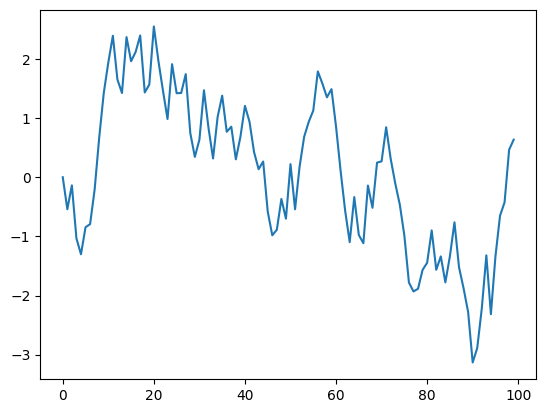

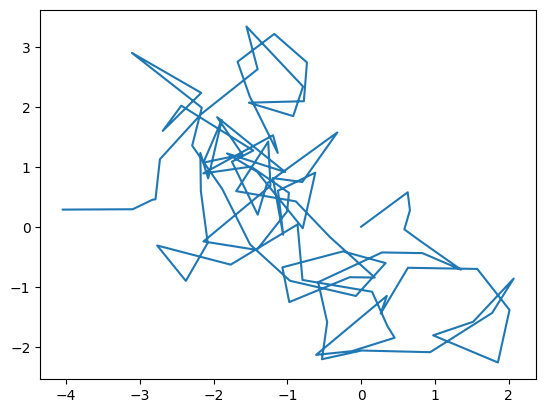

In [1]:
import numpy as np
import matplotlib.pyplot as plt

eta = np.random.uniform(-1.0, 1.0, size=(100,))

eta [0] = 0

x = np.cumsum(eta)
plt.plot(x)
plt.show()

eta = np.random.uniform(-1.0, 1.0, size=(100, 2))
eta [0] = 0
x = np.cumsum(eta, axis=0)
plt.plot(x[:,0], x[:,1])
plt.show()


## 2. More Plotting

1. Display the two-dimensional manifold $z=x \cdot y$ as a [wireframe and surface plot](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html#toolkit-mplot3d-tutorial).
Sample the data in the range $[-1,1]^2$ with 20 samples in each direction.

2. Randomly select 30 images from the MNIST dataset and display them in a $5 \times 6$ grid using subplots.

Again, avoid explicit loops as far as possible.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
#1

x = np.linspace(-1, 1, 20) # 20 samples between -1 and 1
y = np.linspace(-1, 1, 20) # 20 samples between -1 and 1
X, Y = np.meshgrid(x, y) # 20x20 grid
Z = Y * X

fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_wireframe(X, Y, Z, color='k')
ax.set_title('Wireframe')

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_title('Surface')

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
from tensorflow.keras.datasets import mnist

# For the Plot
row = 5
column = 6
# Mnist has 60.000 training and 10.000 testing images
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# Gets 30 random samples
samples = np.random.randint(60000, size=30)
# Stores all the random images in images
images = []
for sample in samples:
    images.append(X_train[sample])

# Plots the images
fig, axs = plt.subplots(5,6, figsize=(8, 5))
i = 0
for r in range(row):
    for c in range(column):
        axs[r, c].imshow(images[i], cmap="gray")
        i = i+1

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'tensorflow'

## 3. Tensors

1. Split the MNIST data set into 120 batches á 500 samples and arrange them as a 4d tensor with the shape (120, 500, 28, 28).

2. Create a new shuffling of these batches.

In [72]:
#1

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Since X_train has 60.000 Samples we can simply split the X_train to obtain the wanted shape
batches = np.array_split(X_train, 120)

# Create 4d tensor from the batches
tensor = np.stack(batches)

print(tensor.shape)

(120, 500, 28, 28)


In [73]:
#2

shuffled_batches = np.random.permutation(batches)

print(shuffled_batches.shape)


(120, 500, 28, 28)


## 4. Broadcast Operations
In order to perform polynomial fitting we will need to collect the powers $x^1, x^2, x^3, x^4$ of our data samples x in a design matrix A with

$A_{ij} = x_i^j$
 
Create this matrix employing numpy's vectorization and broadcasting capabilities. Don't write an explicit loop.

In [74]:
x = np.arange(-1,1,0.1)
x_new = np.transpose([x])
A = np.power(x_new, [1,2,3,4])
print(A)

[[-1.00000000e+00  1.00000000e+00 -1.00000000e+00  1.00000000e+00]
 [-9.00000000e-01  8.10000000e-01 -7.29000000e-01  6.56100000e-01]
 [-8.00000000e-01  6.40000000e-01 -5.12000000e-01  4.09600000e-01]
 [-7.00000000e-01  4.90000000e-01 -3.43000000e-01  2.40100000e-01]
 [-6.00000000e-01  3.60000000e-01 -2.16000000e-01  1.29600000e-01]
 [-5.00000000e-01  2.50000000e-01 -1.25000000e-01  6.25000000e-02]
 [-4.00000000e-01  1.60000000e-01 -6.40000000e-02  2.56000000e-02]
 [-3.00000000e-01  9.00000000e-02 -2.70000000e-02  8.10000000e-03]
 [-2.00000000e-01  4.00000000e-02 -8.00000000e-03  1.60000000e-03]
 [-1.00000000e-01  1.00000000e-02 -1.00000000e-03  1.00000000e-04]
 [-2.22044605e-16  4.93038066e-32 -1.09476443e-47  2.43086534e-63]
 [ 1.00000000e-01  1.00000000e-02  1.00000000e-03  1.00000000e-04]
 [ 2.00000000e-01  4.00000000e-02  8.00000000e-03  1.60000000e-03]
 [ 3.00000000e-01  9.00000000e-02  2.70000000e-02  8.10000000e-03]
 [ 4.00000000e-01  1.60000000e-01  6.40000000e-02  2.56000000e

## 5. Timing

Use [timeit](https://docs.python.org/3.8/library/timeit.html) to compare the computation time required for `naive_add` introduced [here](https://colab.research.google.com/github/rhaschke/Neural-Networks/blob/master/Intro%20Colab%2BTensors.ipynb) and numpy's vector-based *add*. For meaningful results, consider random matrices of size larger than $1000^2$.

In [106]:
import timeit

def naive_add(x, y):
  assert len(x.shape) == 2      # x & y are 2D numpy tensors
  assert x.shape == y.shape
  x = x.copy()                  # Avoid overwriting the input tensor
  
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

a = np.random.rand(1000,1000) # Create random matrice with 1000x1000 size
b = np.random.rand(1000,1000)

""" 
Since this libary can not look locally we have to import the neccesary
modules to run the naive_add function
"""

stmt = "naive_add(a, b)"
setup = "import numpy as np; from __main__ import naive_add, a, b"
time = timeit.timeit(stmt, setup=setup, number=1)

print(f'The naive add takes: {time} s')

stmt2 = "np.add(a,b)"
setup2 = "import numpy as np; from __main__ import a, b"

time2 = timeit.timeit(stmt2, setup=setup2, number=1)

print(f'The numpy add takes: {time2} s')

The naive add takes: 0.15247770000132732 s
The numpy add takes: 0.0010991000017384067 s
